# Digit-based Fraud Detection

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from plotnine import *

In [2]:
cand100 = pd.read_csv(f'data/candidatescore100.csv')
cand100 = cand100[cand100.score>0]
cand100['first_digit'] = cand100.score.map(lambda x: int(str(x)[0]))
cand100['last_digit'] = cand100.score.map(lambda x: int(str(x)[-1]))

In [3]:
cand100.tail()

,จังหวัด,เขตเลือกตั้ง,no,newname,พรรคการเมือง,score,first_digit,last_digit
11139,อุบลราชธานี,10,35,ร้อยตรีเชิดชัย พรพัชระกุล,รักท้องถิ่นไทย,43,4,3
11140,อุบลราชธานี,10,34,นายสมศรี บุญเหลือ,แทนคุณแผ่นดิน,42,4,2
11141,อุบลราชธานี,10,36,นางพุดตาล พุฒตาล,ไทรักธรรม,42,4,2
11142,อุบลราชธานี,10,33,นายบุญมี ทองมาก,ภาคีเครือข่ายไทย,37,3,7
11143,อุบลราชธานี,10,25,นายบุญกอง มูลสุวรรณ,ภราดรภาพ,35,3,5


In [4]:
cand100.describe()

,เขตเลือกตั้ง,no,score,first_digit,last_digit
count,10609.000000,10609.000000,10609.000000,10609.000000,10609.000000
mean,4.494674,16.832501,3349.292770,3.359600,4.559996
std,4.750843,9.823486,8712.933608,2.408451,2.869754
min,1.000000,1.000000,3.000000,1.000000,0.000000
25%,2.000000,8.000000,93.000000,1.000000,2.000000
50%,3.000000,16.000000,231.000000,3.000000,5.000000
75%,5.000000,24.000000,812.000000,5.000000,7.000000
max,30.000000,44.000000,72016.000000,9.000000,9.000000


## First-Digit Distribution aka Benford's Law

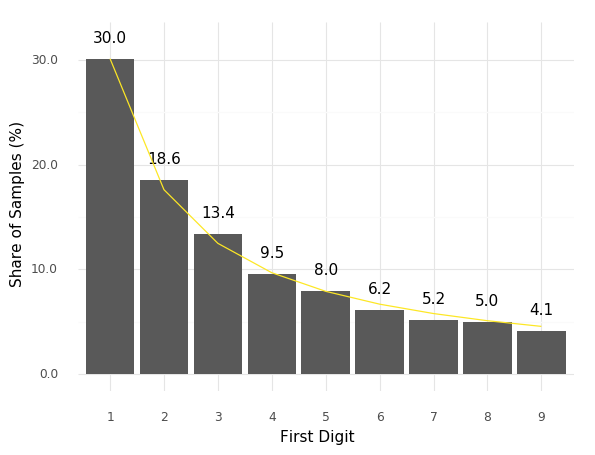

<ggplot: (-9223363294324097578)>

In [5]:
def gen_benford(d): return np.log10(d+1) - np.log10(d)
first_digit = pd.DataFrame(cand100.first_digit.value_counts() / cand100.shape[0]).reset_index()
first_digit.columns = ['digit','per']
first_digit['benford'] = first_digit.digit.map(gen_benford)

g = (ggplot(first_digit, aes(x='factor(digit)',y='per')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    geom_text(aes(label='round(per*100,1)',y='per+0.02')) +
    geom_line(first_digit, aes(x='factor(digit)',y='benford',group=1,color=1)) +
    theme(legend_position='none') +
    xlab('First Digit') + ylab('Share of Samples (%)'))
g

## First Two-Digit Distribution

In [6]:
c = cand100[cand100.score>=10].copy()
c['second_digit'] = c.score.map(lambda x: int(str(x)[1]))
c['first_2'] = c.score.map(lambda x: int(str(x)[:2]))
c.head()

,จังหวัด,เขตเลือกตั้ง,no,newname,พรรคการเมือง,score,first_digit,last_digit,second_digit,first_2
0,กระบี่,1,18,นายสาคร เกี่ยวข้อง,ประชาธิปัตย์,44346,4,6,4,44
1,กระบี่,1,2,นายแสงชัย วสุนธรา,พลังประชารัฐ,30381,3,1,0,30
2,กระบี่,1,15,นายยุทธนา อ่าวลึกน้อย,อนาคตใหม่,17783,1,3,7,17
3,กระบี่,1,16,นายทวีเกียรติ ใจดี,ประชาชาติ,8484,8,4,4,84
4,กระบี่,1,10,ว่าที่ พ.ต.กิตติศักดิ์ กิตติสิทโธ,ภูมิใจไทย,4784,4,4,7,47


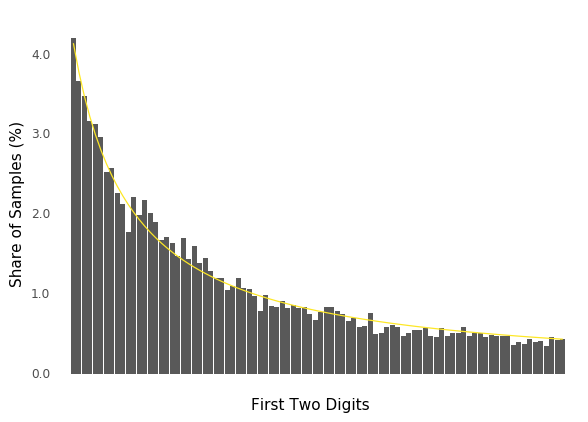

<ggplot: (-9223363294327858025)>

In [7]:
first_2 = pd.DataFrame(c.first_2.value_counts() / c.shape[0]).reset_index()
first_2.columns = ['digit','per']
first_2['benford'] = first_2.digit.map(gen_benford)

g = (ggplot(first_2, aes(x='factor(digit)',y='per')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
#     geom_text(aes(label='round(per*100,1)',y='per+0.02')) +
    geom_line(first_2, aes(x='factor(digit)',y='benford',group=1,color=1)) +
    theme(legend_position='none',axis_text_x=element_blank(), panel_grid=element_blank()) +
    xlab('First Two Digits') + ylab('Share of Samples (%)'))
g

## Last Digit Distribution

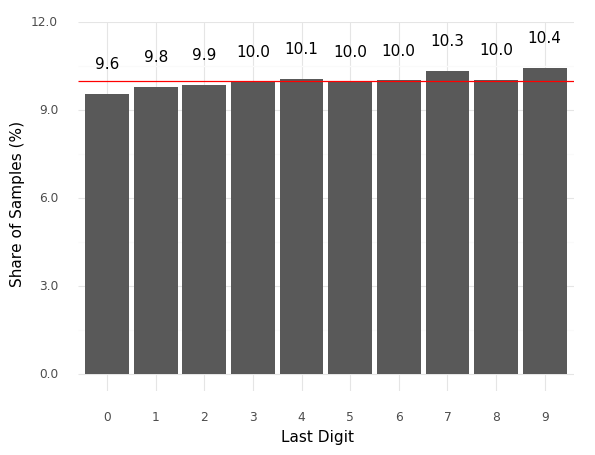

<ggplot: (8742526815268)>

In [8]:
last_digit = pd.DataFrame(cand100.last_digit.value_counts() / cand100.shape[0]).reset_index()
last_digit.columns = ['digit','per']

g = (ggplot(last_digit, aes(x='factor(digit)',y='per')) + geom_bar(stat='identity') +
    theme_minimal() + scale_y_continuous(labels = lambda x: np.round(x*100,0)) +
    geom_text(aes(label='round(per*100,1)',y='per+0.01')) +
    geom_hline(yintercept=0.1,colour='red') +
    xlab('Last Digit') + ylab('Share of Samples (%)'))
g